## EXPERIMENTOS PARÁMETROS FILTROS NOTCH Y PASO BANDA: 
#### ORDEN Y NUMTAPS

In [1]:
# MODULES
from mne.io import read_raw_brainvision
from TFG_utils import (returnFolders, returnFiles, take_vmrk_files, take_vhdr_files, take_eeg_files, plot_eeg_time, plot_PSD, plot_freq_response)
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
import mne
import numpy as np
from scipy import signal
#%matplotlib notebook

In [2]:
# COLLECTING DATA
foldername = 'EEG_folders'
EEG_folders=returnFolders(foldername)
EEG_files=returnFiles(EEG_folders)
vmrk_files=take_vmrk_files(EEG_files)
vhdr_files=take_vhdr_files(EEG_files)
eeg_files=take_eeg_files(EEG_files)

In [3]:
# READING and PREPROCESSING DATA
spots_times_sec = [0, 60, 120, 180, 226, 287, 347] # Time (sec) at which each spot begins
verbose=True
i=0
raw = read_raw_brainvision(vhdr_files[i],verbose=verbose).load_data(verbose=verbose)
sampling_freq = int(raw.info['sfreq'])

Extracting parameters from EEG_folders\eeg_example_1\Neuromarketing3850.vhdr...
Setting channel info structure...
Reading 0 ... 240139  =      0.000 ...   480.278 secs...


# 1. NOTCH FILTER: Order


 NOTCH FILTER (Order: 1)

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -6.02, -6.02 dB



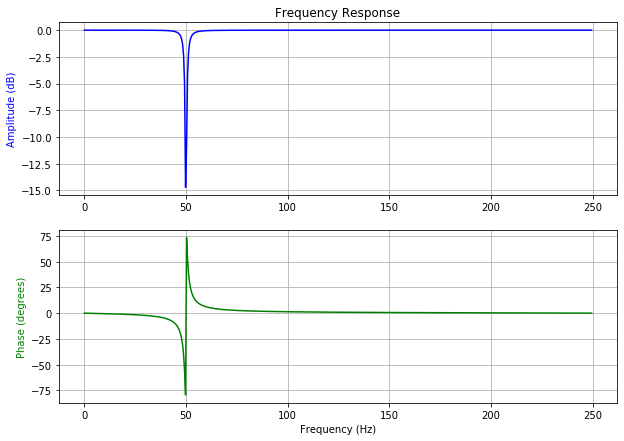

Setting up band-stop filter from 49 - 51 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


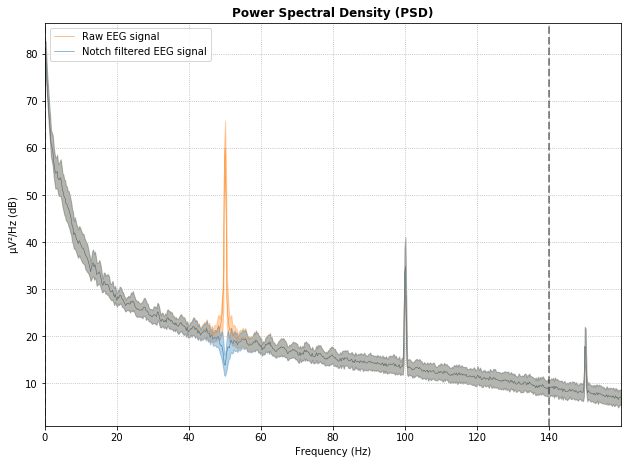

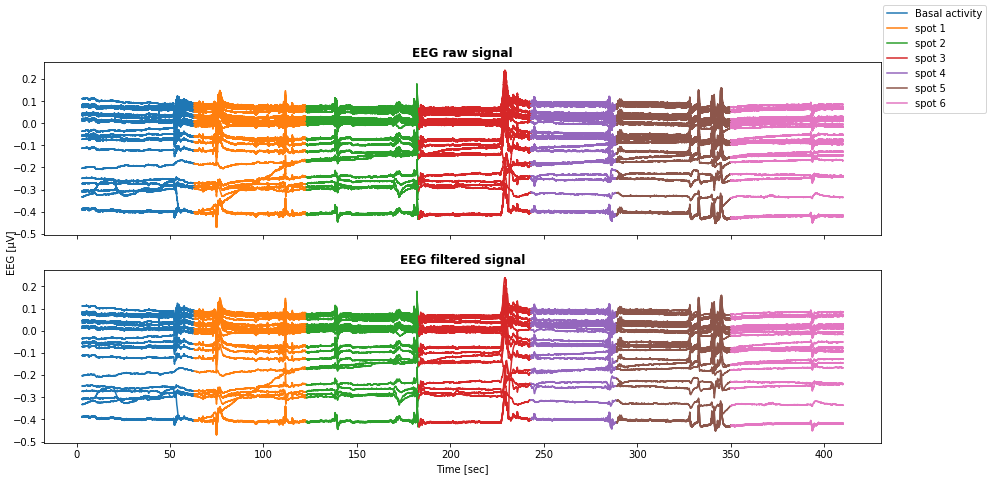


 NOTCH FILTER (Order: 2)

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -6.02, -6.02 dB



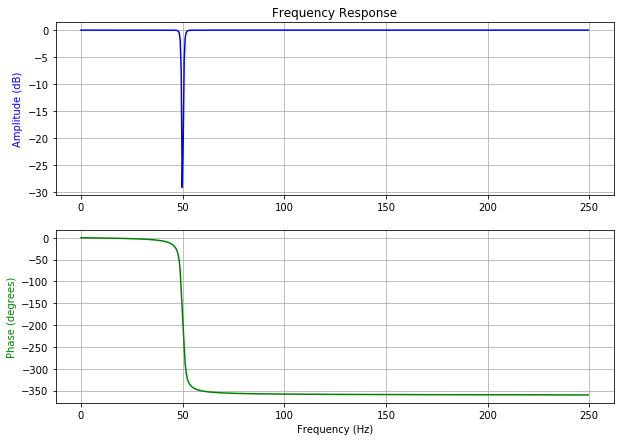

Setting up band-stop filter from 49 - 51 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


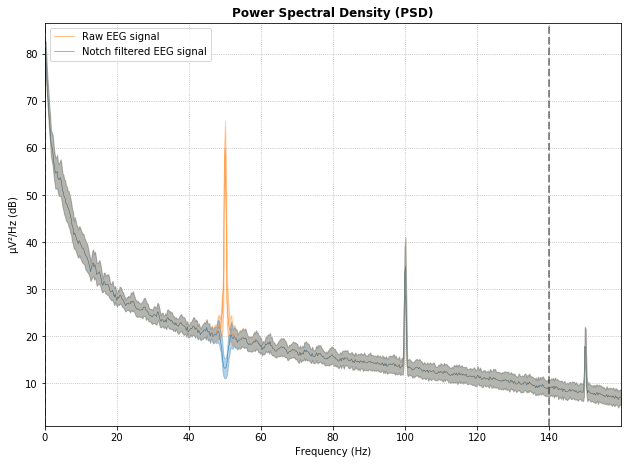

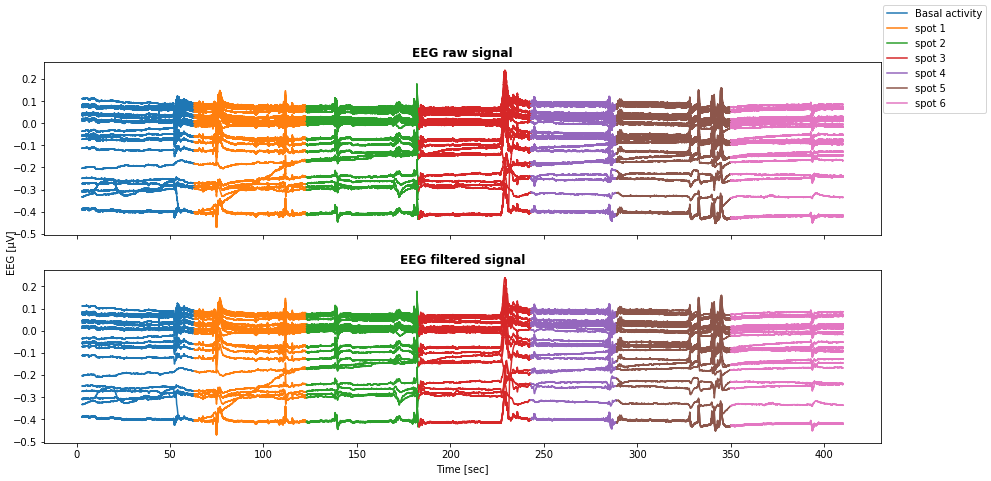


 NOTCH FILTER (Order: 3)

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -6.02, -6.02 dB



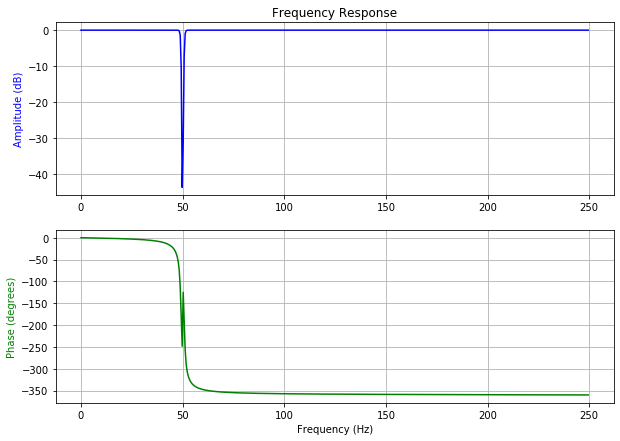

Setting up band-stop filter from 49 - 51 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


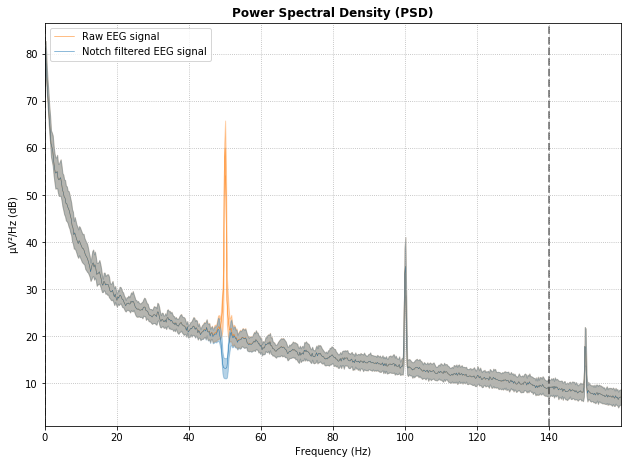

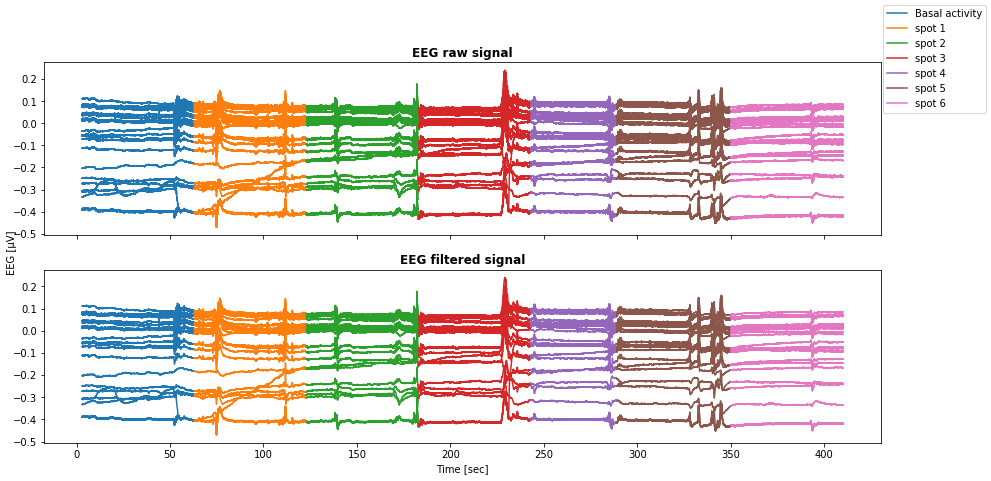


 NOTCH FILTER (Order: 4)

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -6.02, -6.02 dB



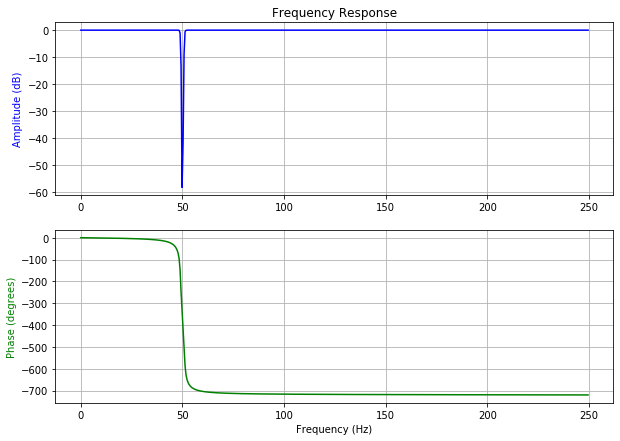

Setting up band-stop filter from 49 - 51 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


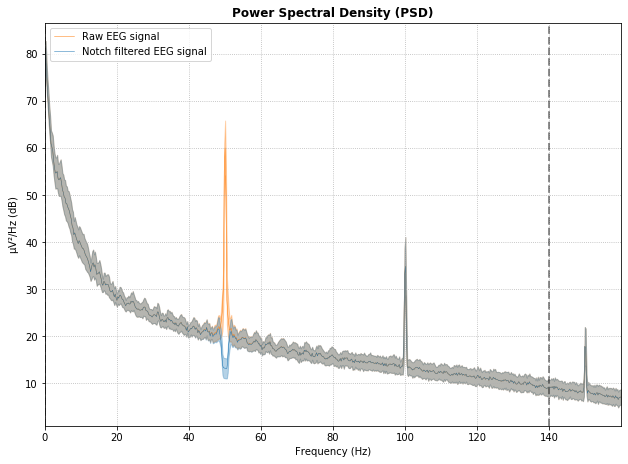

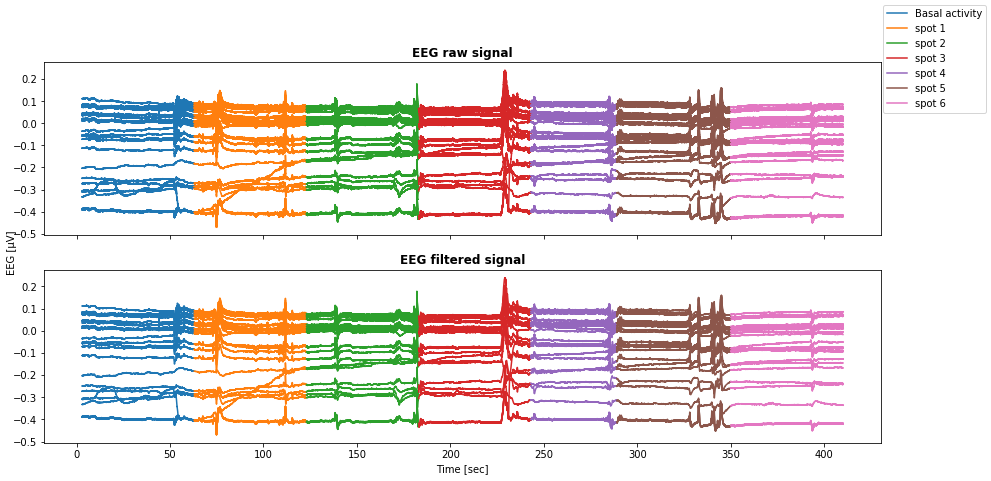


 NOTCH FILTER (Order: 5)

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -6.02, -6.02 dB



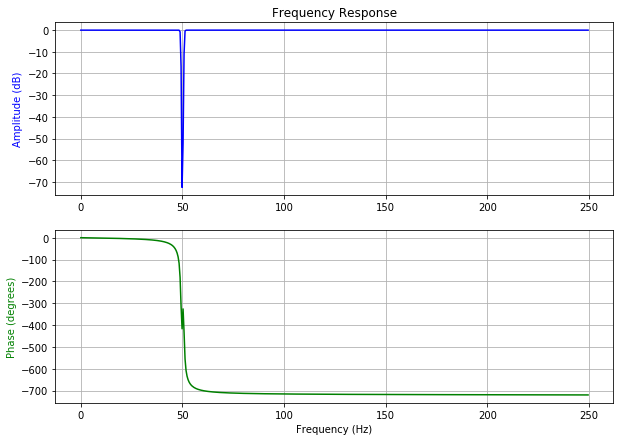

Setting up band-stop filter from 49 - 51 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


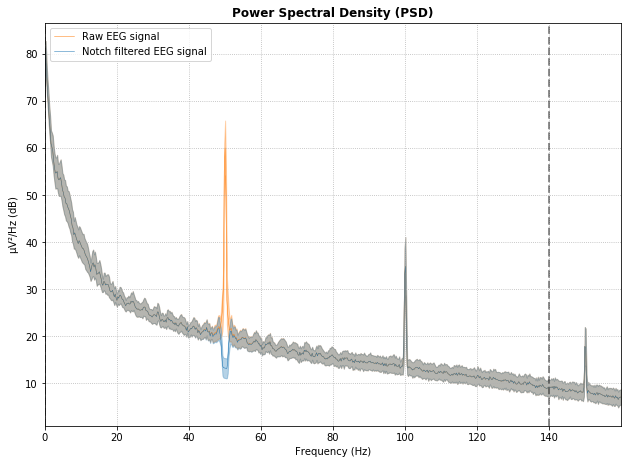

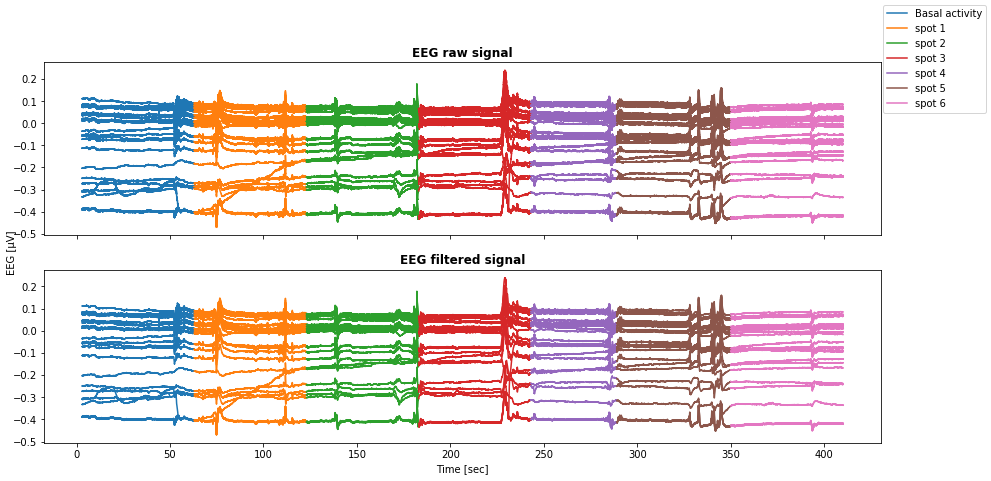


 NOTCH FILTER (Order: 6)

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -5.98, -5.96 dB



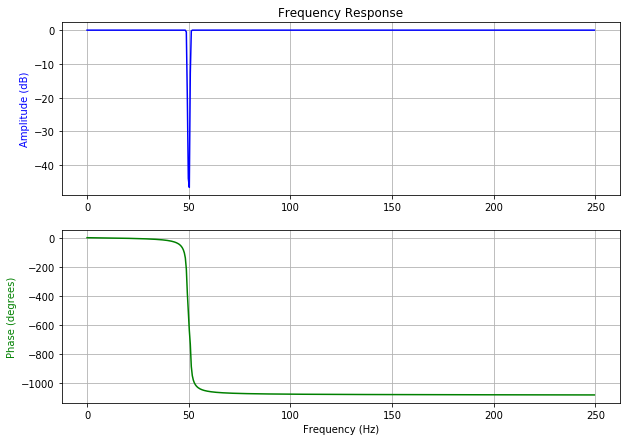

Setting up band-stop filter from 49 - 51 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


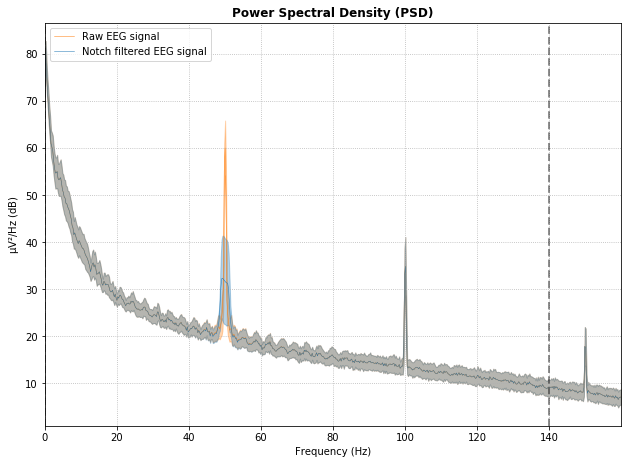

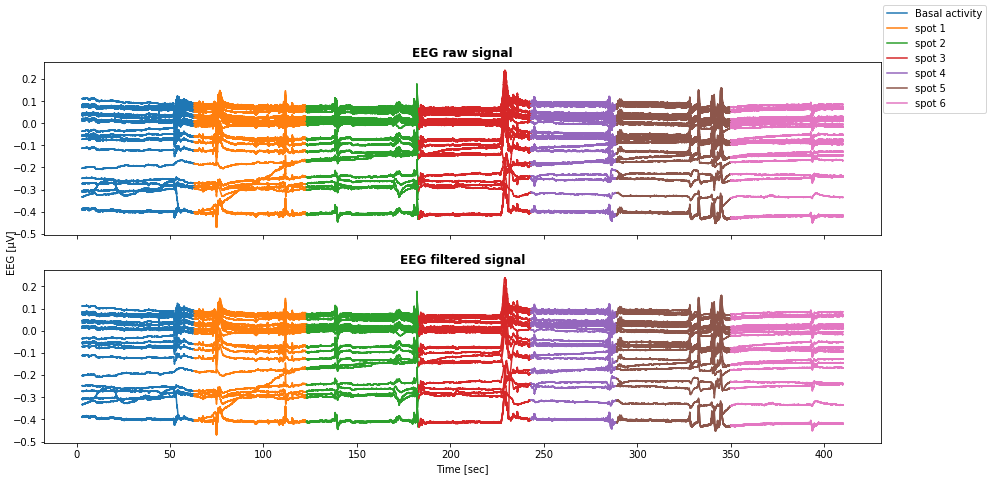

In [6]:
orders=[1,2,3,4,5,6]

for order in orders:
    print('\n','\033[1;34m' + 'NOTCH FILTER (Order: %s)'%(order)+'\033[0;m')
    notch_filtered=raw.copy().set_montage("standard_1020",verbose=verbose)
    f0=50
    iir_params = dict(order=order, ftype='butter', output='ba')
    iir_params = mne.filter.construct_iir_filter(iir_params,sfreq=sampling_freq, f_pass= [49, 51],btype='bandstop',return_copy=False, verbose=verbose)
    b,a=(iir_params['b'],iir_params['a'])
    plot_freq_response(b,a,sampling_freq)
    notch_filtered.notch_filter(f0,method='iir',iir_params={'b':b,'a':a},verbose=verbose)
    plot_PSD(raw,notch_filtered, filter_applied='Notch filtered EEG signal')
    plt.show()
    plot_eeg_time(raw,notch_filtered,i,vmrk_files)

1. (Orden 4) --> ¿pico diagrama fase?

2. **(Orden 8) Funciona bien**
3. (Orden 12) --> ¿diagrama fase?
4. (Orden 16) Funciona bien
5. (Orden 20) --> ¿diagrama fase?
6. (Orden 24) Descartado porque en la PSD se ve que no quita la f0=50 Hz

# 2. BAND PASS FILTER: Numtaps (FIR)


 BAND PASS FILTER (FIR) (Numtaps: 50)
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 25001 samples (50.002 sec)



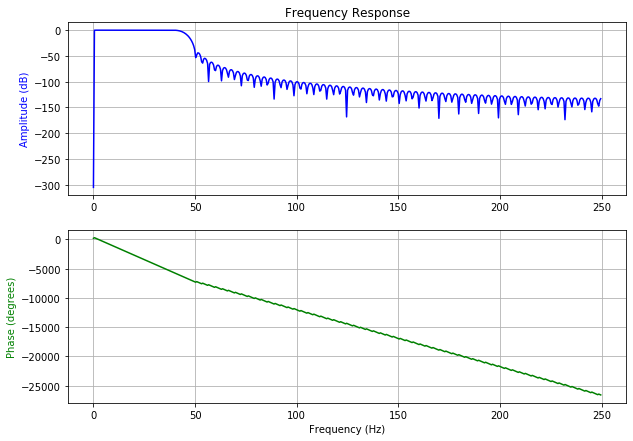

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 25001 samples (50.002 sec)

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


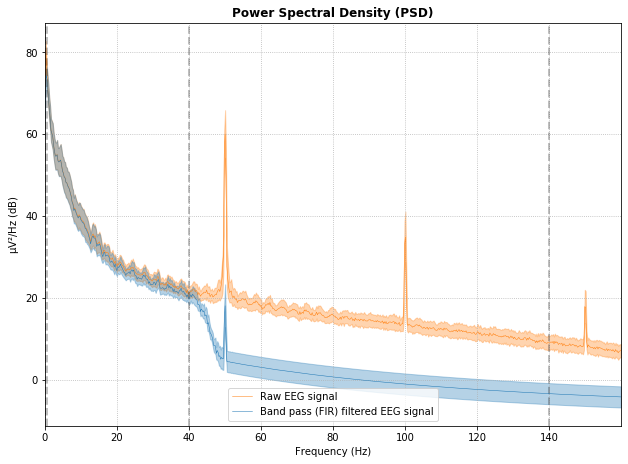

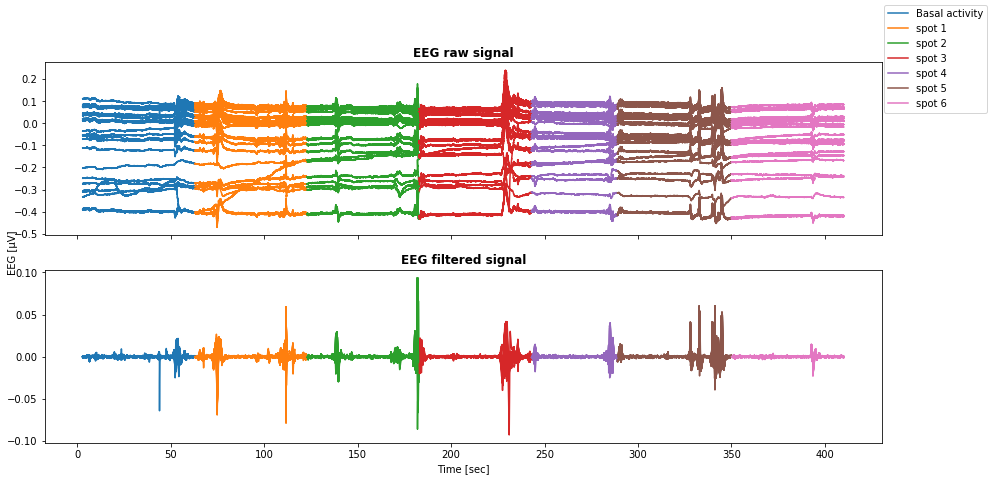


 BAND PASS FILTER (FIR) (Numtaps: 100)
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 50001 samples (100.002 sec)



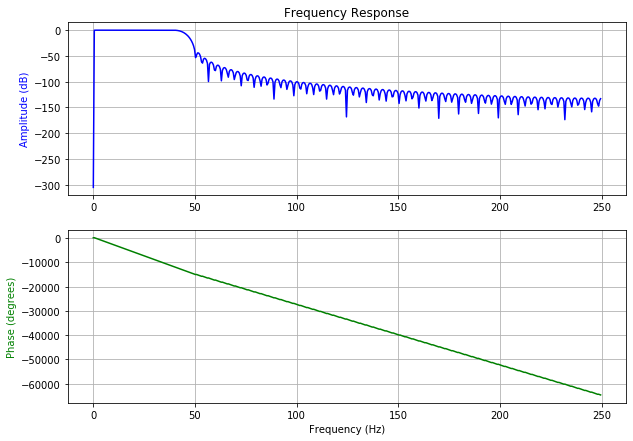

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 50001 samples (100.002 sec)

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


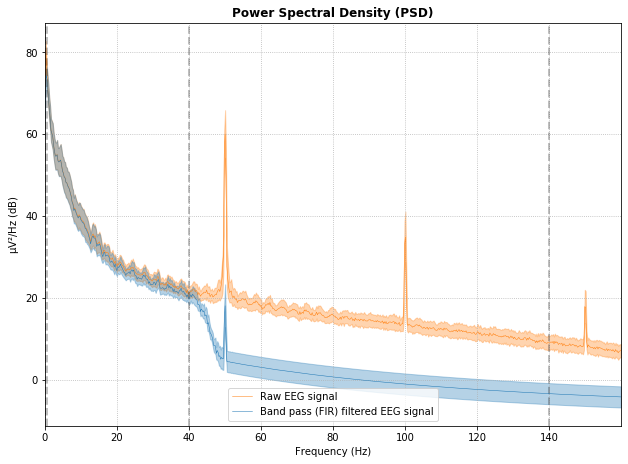

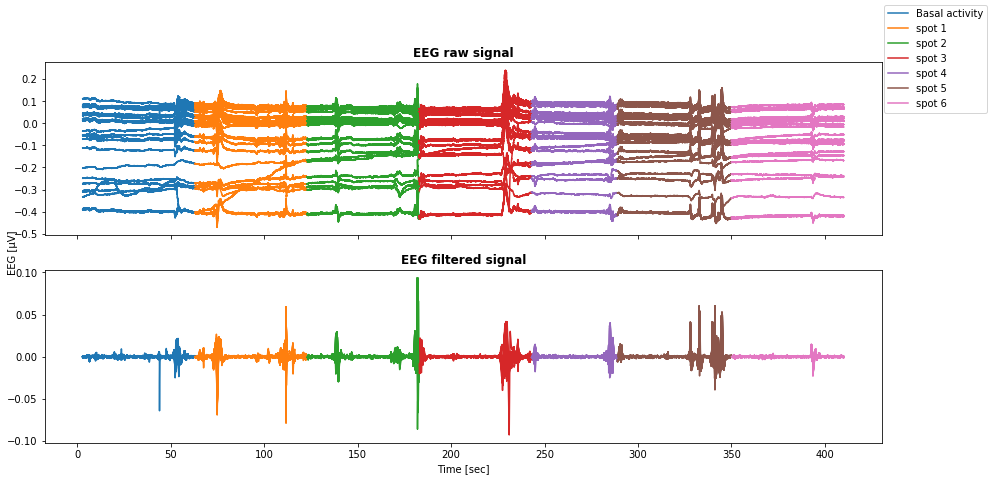


 BAND PASS FILTER (FIR) (Numtaps: 400)
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 200001 samples (400.002 sec)



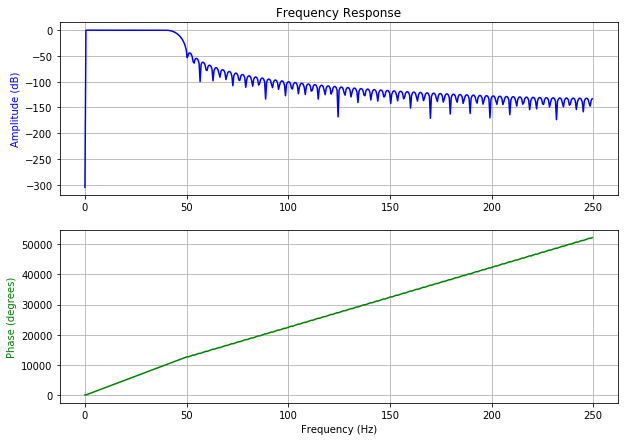

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 200001 samples (400.002 sec)

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


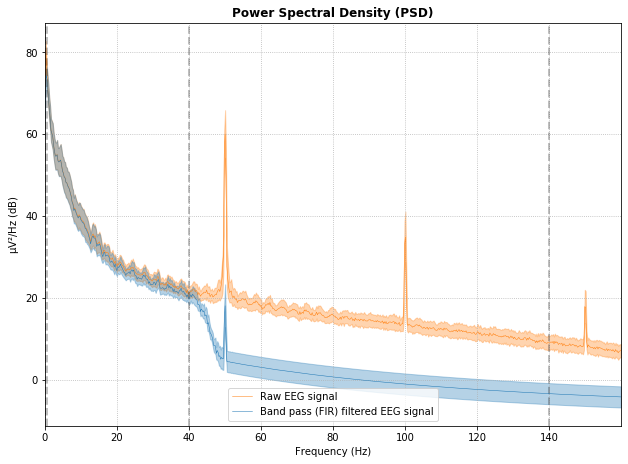

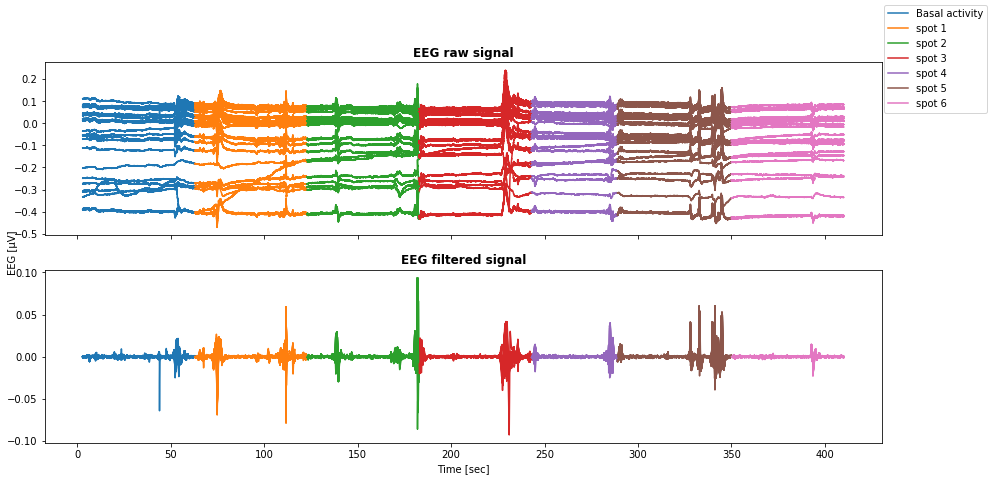

In [7]:
numtaps=[50,100,400] #filter lenght in sec

for numtap in numtaps:
    print('\n','\033[1;34m' + 'BAND PASS FILTER (FIR) (Numtaps: %s)'%(numtap)+'\033[0;m')
    bpfir_filtered=raw.copy().set_montage("standard_1020",verbose=verbose)
    f1,f2=(0.5,40)
    numtaps=str(numtap)+'s' #filter lenght in sec
    b = mne.filter.create_filter(bpfir_filtered['all'][1], filter_length=numtaps,sfreq=sampling_freq, l_freq=f1, h_freq=f2,
                                 method='fir', fir_window='hann',fir_design='firwin', verbose=verbose)
    plot_freq_response(b,1,sampling_freq)
    bpfir_filtered.filter(l_freq=f1, h_freq=f2, filter_length=numtaps, method='fir', fir_window='hann', fir_design='firwin',verbose=verbose)
    plot_PSD(raw,bpfir_filtered, filter_applied='Band pass (FIR) filtered EEG signal')
    plt.show()
    plot_eeg_time(raw,bpfir_filtered,i,vmrk_files)

1. numtaps=50 --> 25.000 muestras
2. numtaps=100 --> 50.000 muestras
3. numtaps=400 --> 200.000 muestras

# 3. BAND PASS FILTER (FIR) + NOTCH


IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 10001 samples (20.002 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

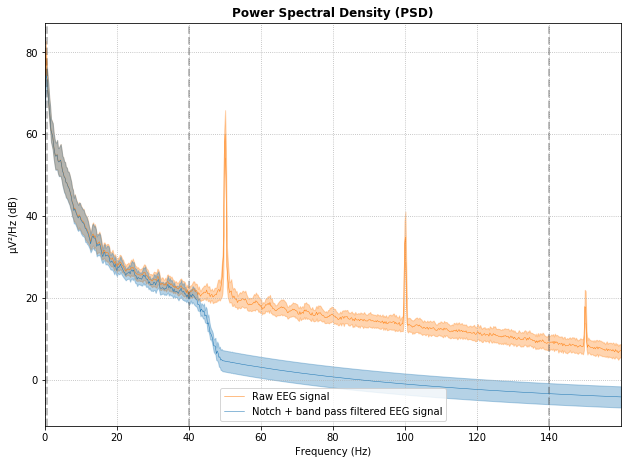

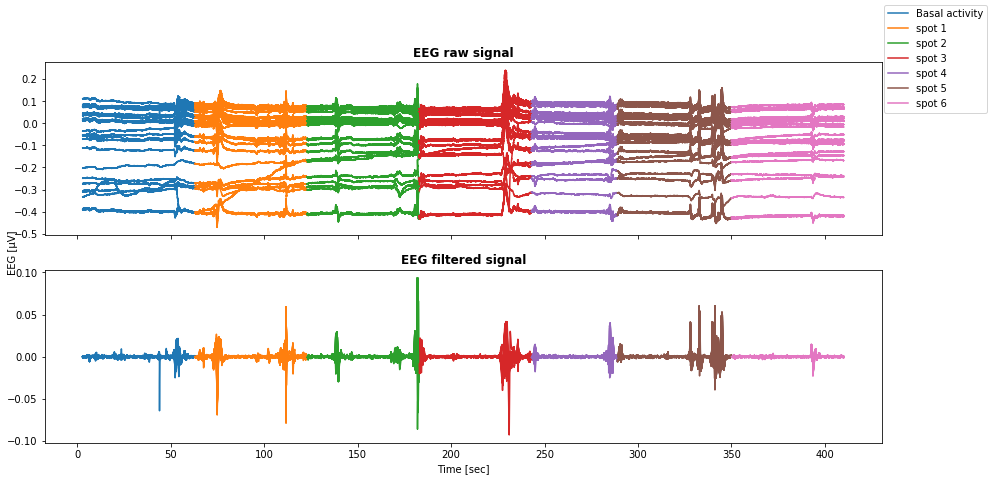


 ONLY BAND PASS FILTER (Numtaps: 20)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


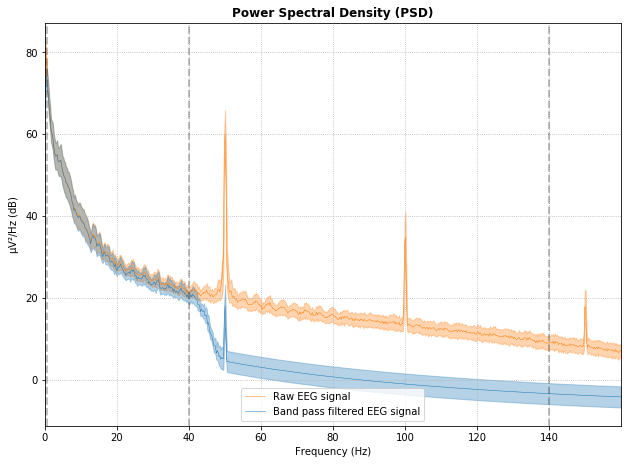

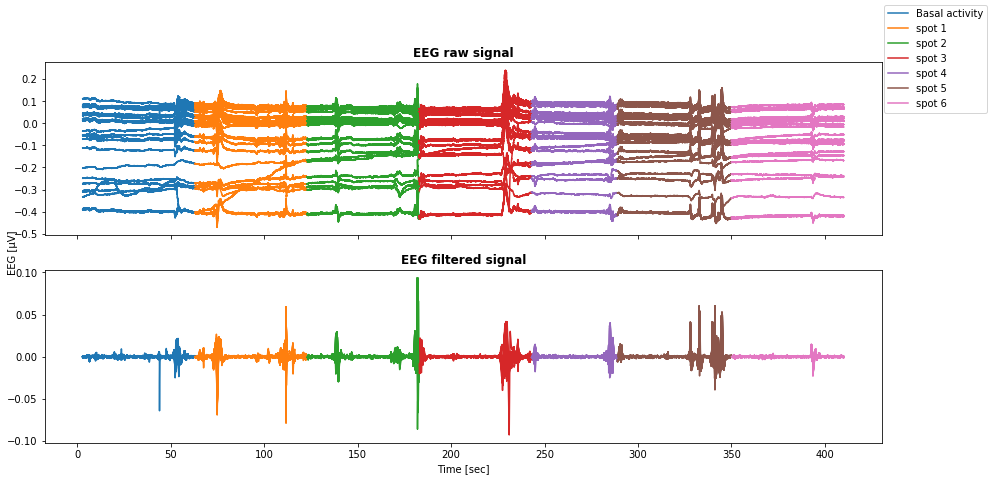

In [8]:
numtaps=20
order=2

#Notch filter (IIR)
nbpfir_filtered=raw.copy().set_montage("standard_1020",verbose=verbose)
f0=50
iir_params = dict(order=order, ftype='butter', output='ba')
iir_params = mne.filter.construct_iir_filter(iir_params,sfreq=sampling_freq, f_pass= [49, 51],btype='bandstop',return_copy=False, verbose=verbose)
b,a=(iir_params['b'],iir_params['a'])
#plot_freq_response(b,a,sampling_freq)
nbpfir_filtered.notch_filter(f0,method='iir',iir_params={'b':b,'a':a},verbose=verbose)

#Band pass filter (FIR)
bpfir_filtered=raw.copy().set_montage("standard_1020",verbose=verbose)
f1,f2=(0.5,40)
numtap=str(numtaps)+'s' #filter lenght in sec
b = mne.filter.create_filter(nbpfir_filtered['all'][1], filter_length=numtap,sfreq=sampling_freq, l_freq=f1, h_freq=f2,
                             method='fir', fir_window='hann',fir_design='firwin', verbose=verbose)
#plot_freq_response(b,1,sampling_freq)
nbpfir_filtered.filter(l_freq=f1, h_freq=f2, filter_length=numtap, method='fir', fir_window='hann', fir_design='firwin',verbose=verbose)
bpfir_filtered.filter(l_freq=f1, h_freq=f2, filter_length=numtap, method='fir', fir_window='hann', fir_design='firwin',verbose=verbose)

# VISUALIZATION
print('\n','\033[1;34m' + 'NOTCH FILTER (Order: %s) + BAND PASS FILTER (Numtaps: %s)'%(order,numtaps)+'\033[0;m')
plot_PSD(raw,nbpfir_filtered, filter_applied='Notch + band pass filtered EEG signal')
plt.show()
plot_eeg_time(raw,nbpfir_filtered,i,vmrk_files)

print('\n','\033[1;34m' + 'ONLY BAND PASS FILTER (Numtaps: %s)'%(numtaps)+'\033[0;m')
plot_PSD(raw,bpfir_filtered, filter_applied='Band pass filtered EEG signal')
plt.show()
plot_eeg_time(raw,bpfir_filtered,i,vmrk_files)

Mejor usar **ambos filtros**, sino la interferencia de la red eléctrica (f=50Hz) no se elimina bien.

# 4. BAND PASS FILTER: Order (IIR)


 BAND PASS FILTER (IIR, Order: 1)

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 4 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -6.02, -6.02 dB



C:\Users\noemi\OneDrive\Escritorio\UNI\TFG\codigo Noemi\TFG-NOEMI\TFG_utils.py:186: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')


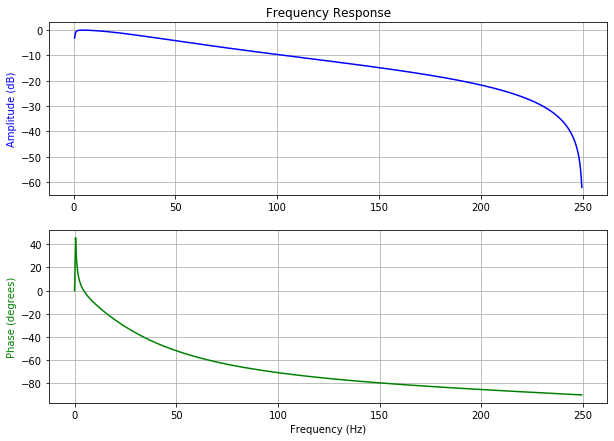

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


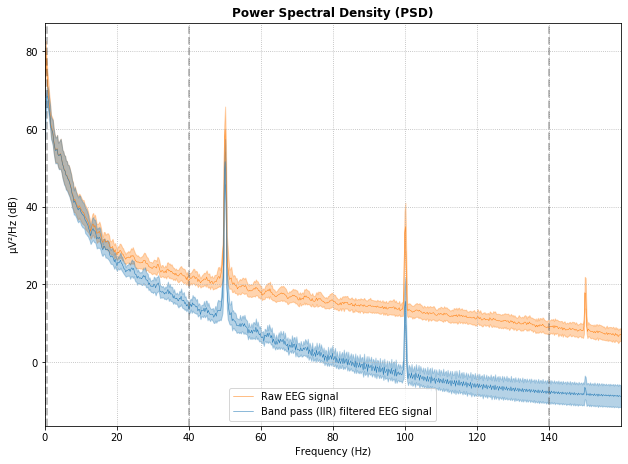

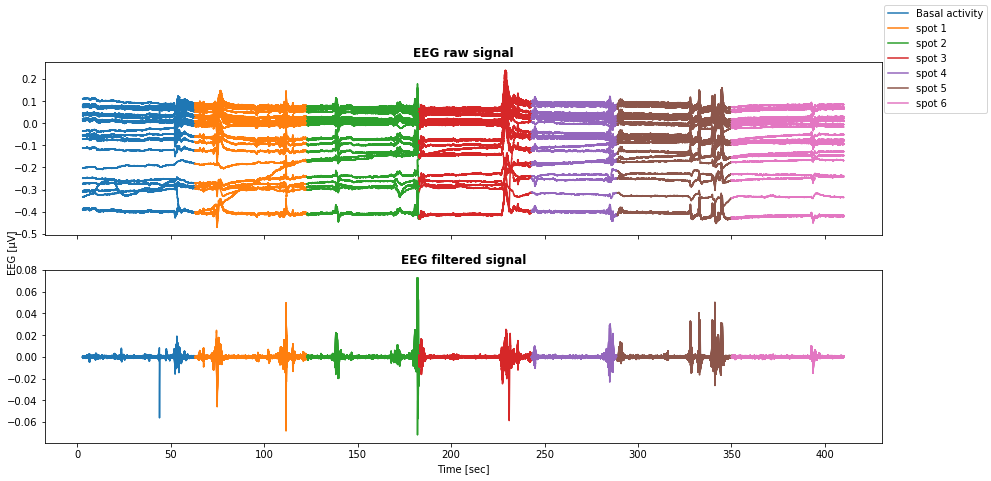


 BAND PASS FILTER (IIR, Order: 2)

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -6.02, -6.02 dB



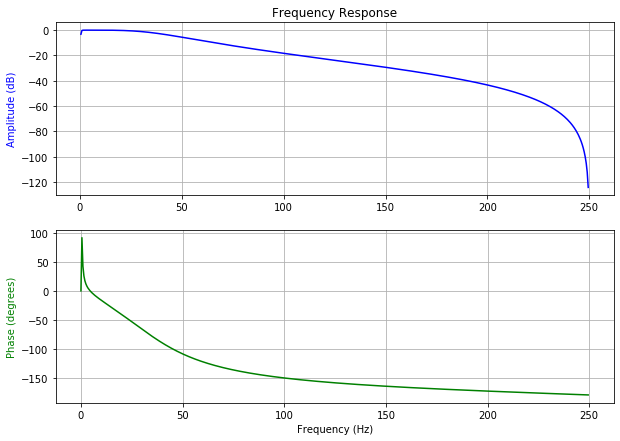

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


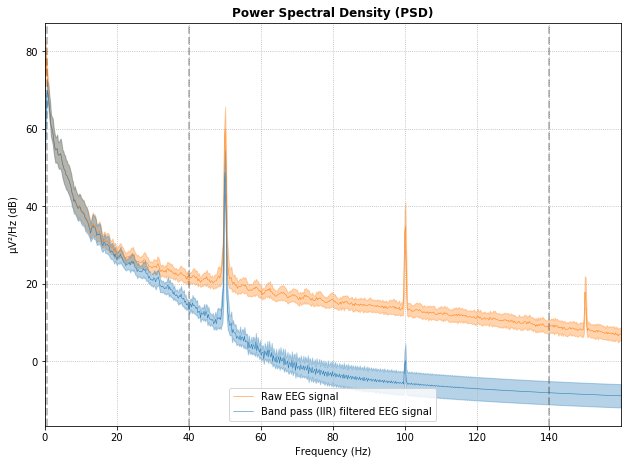

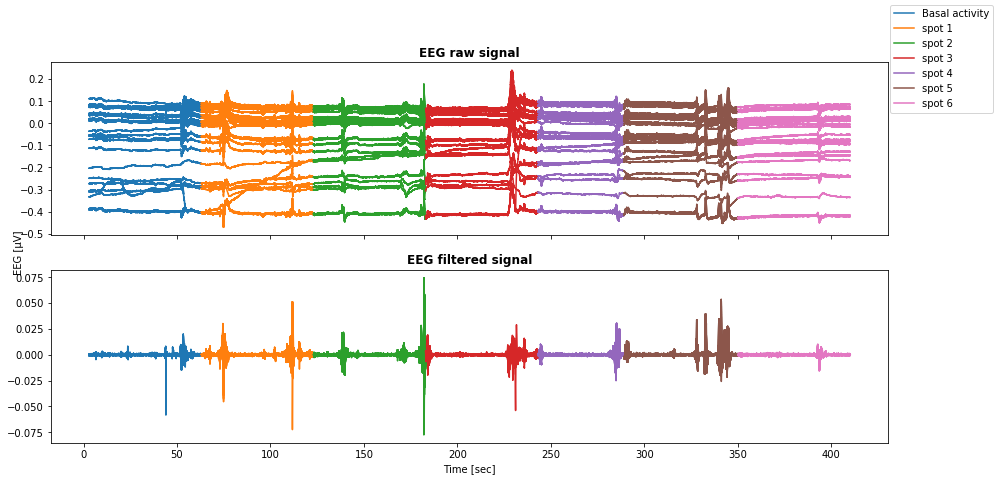


 BAND PASS FILTER (IIR, Order: 3)

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 12 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -6.02, -6.02 dB



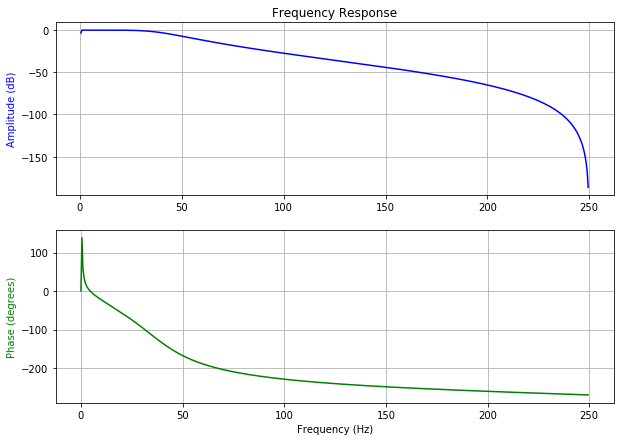

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


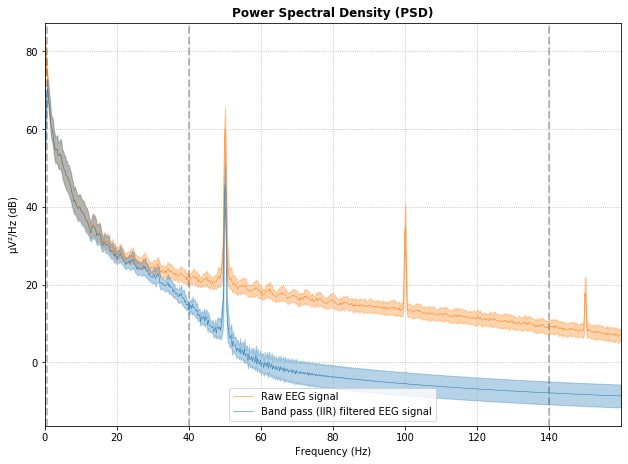

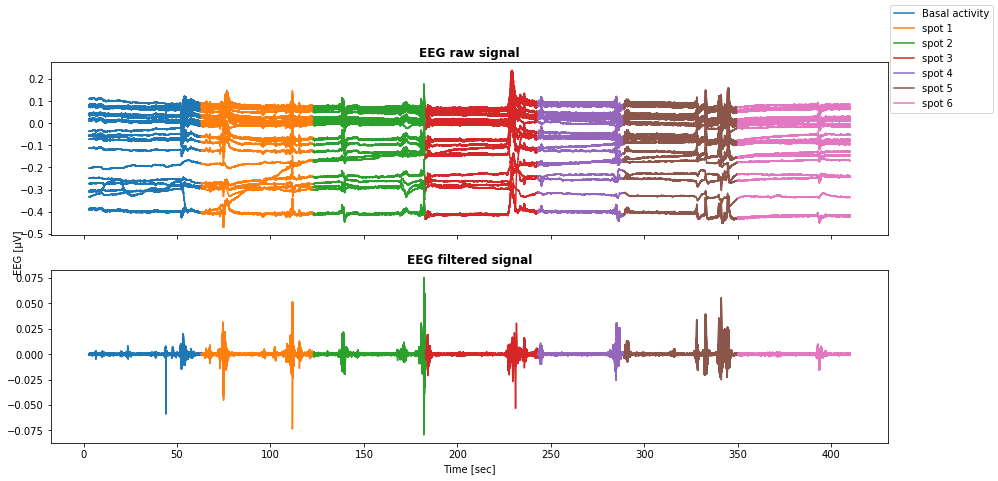


 BAND PASS FILTER (IIR, Order: 4)

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -6.02, -6.02 dB



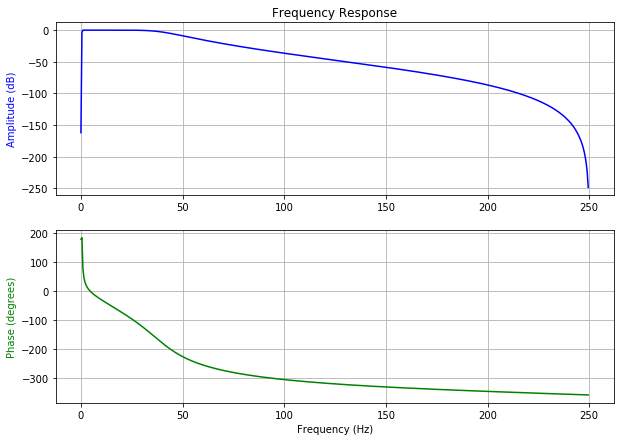

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


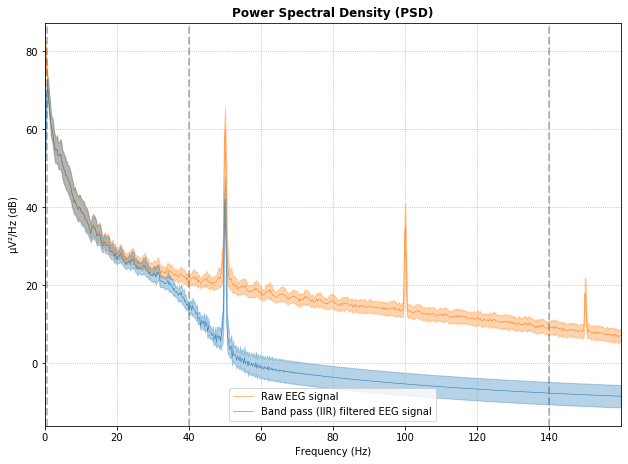

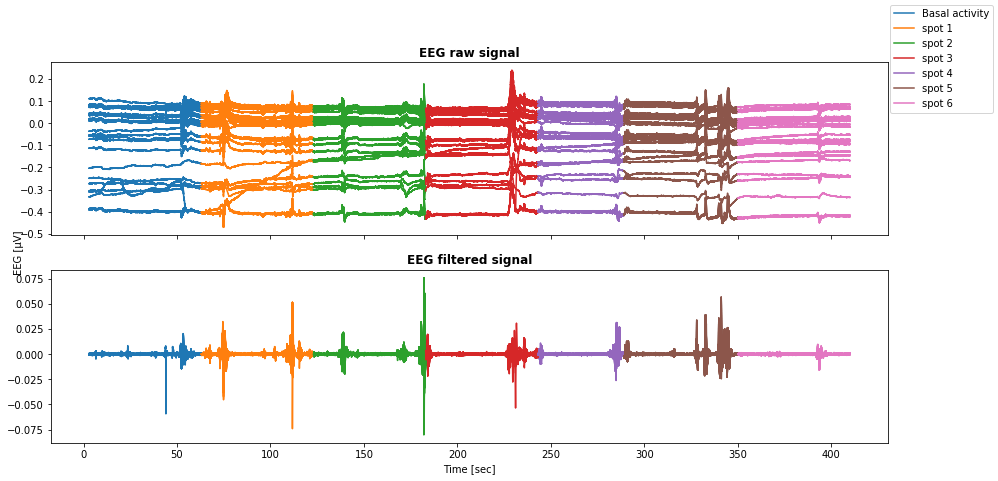


 BAND PASS FILTER (IIR, Order: 5)

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -5.64, -6.02 dB



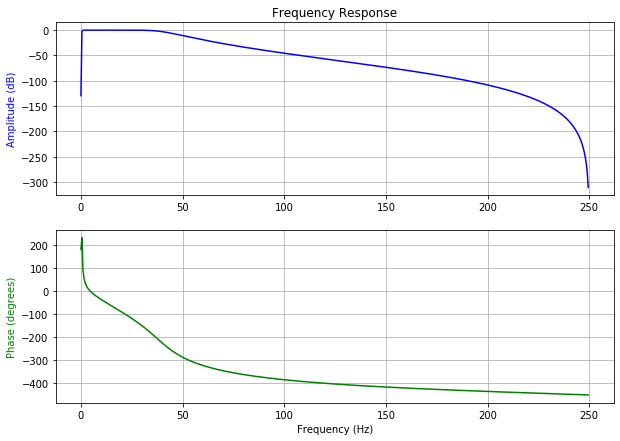

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


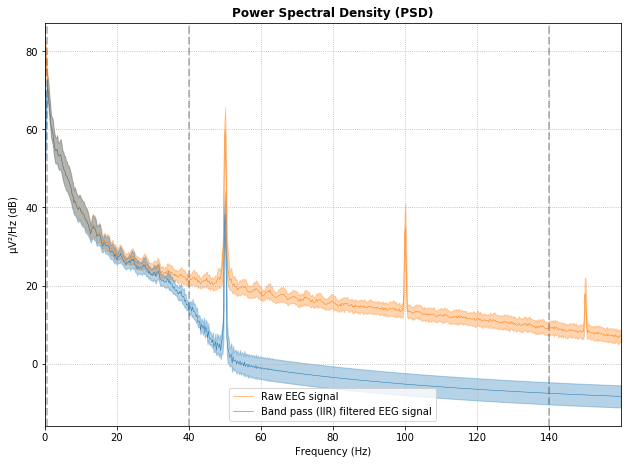

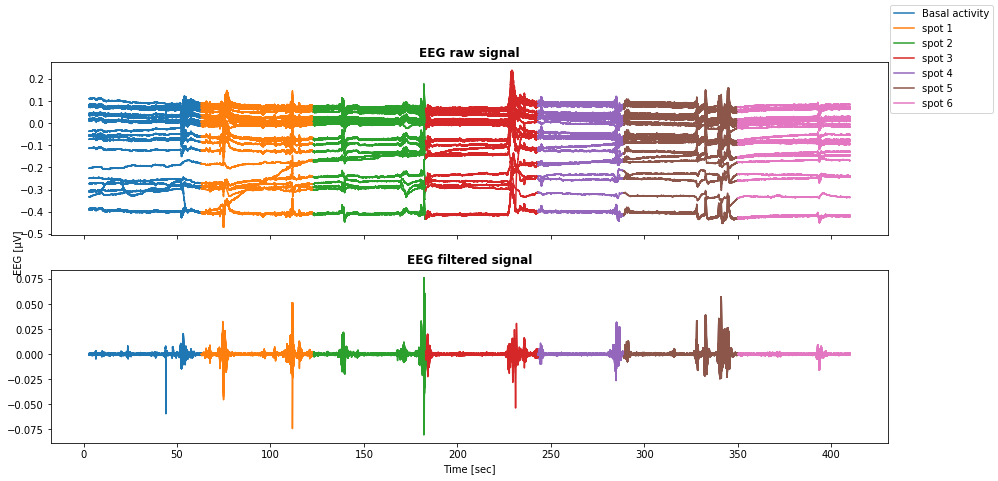

In [9]:
orders=[1,2,3,4,5]

for order in orders:
    print('\n','\033[1;34m' +  'BAND PASS FILTER (IIR, Order: %s)'%(order)+'\033[0;m')
    bpiir_filtered=raw.copy().set_montage("standard_1020",verbose=verbose)
    f1,f2=(0.5,40)
    iir_params = dict(order=order, ftype='butter', output='ba')
    iir_params = mne.filter.construct_iir_filter(iir_params, f_pass=(f1,f2),sfreq=sampling_freq, btype='bandpass',return_copy=False, verbose=verbose)
    b,a=(iir_params['b'],iir_params['a'])
    plot_freq_response(b,a,sampling_freq)
    bpiir_filtered.filter(l_freq=f1, h_freq=f2,method='iir',iir_params=iir_params, verbose=verbose)
    plot_PSD(raw,bpiir_filtered, filter_applied='Band pass (IIR) filtered EEG signal')
    plt.show()
    plot_eeg_time(raw,bpiir_filtered,i,vmrk_files)

El filtro paso banda IIR no funciona tan bien como el FIR -->  **FPB (FIR)**

# 5. BAND PASS FILTER (IIR) + NOTCH


IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 49.00, 51.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 49 - 51 Hz


IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoffs at 0.50, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz


 NOTCH FILTER (Order: 2) + BAND PASS FILTER (Order: 2)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


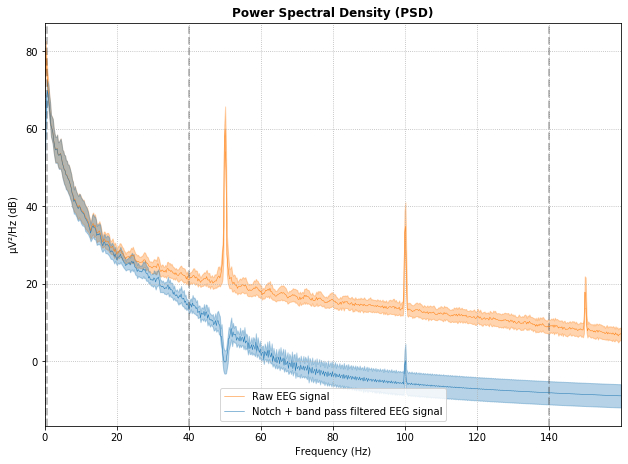

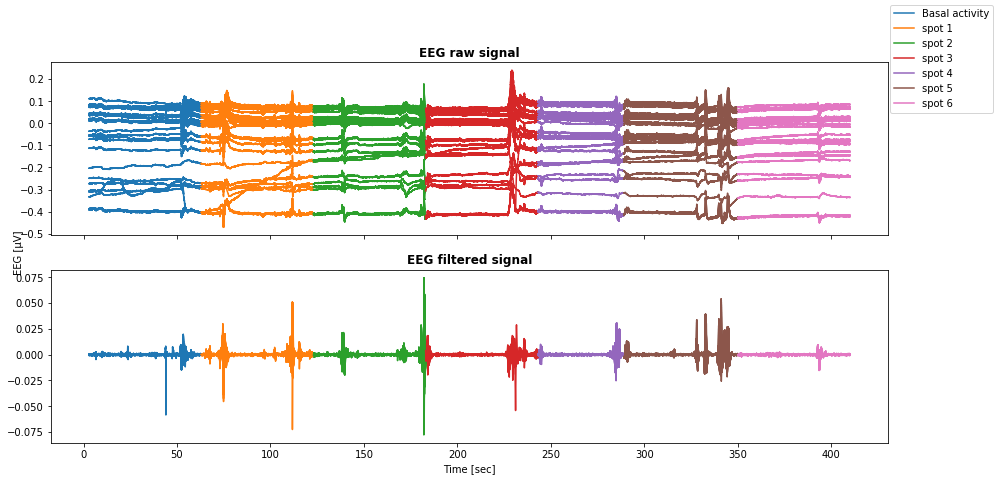


 ONLY BAND PASS FILTER (Order: 2)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)
No projector specified for this dataset. Please consider the method self.add_proj.
Effective window size : 4.096 (s)


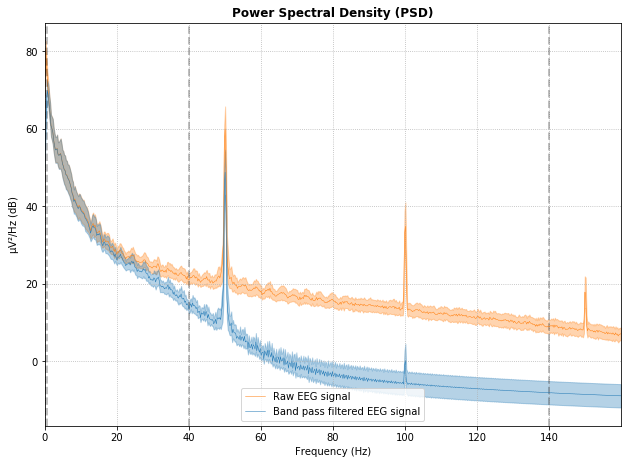

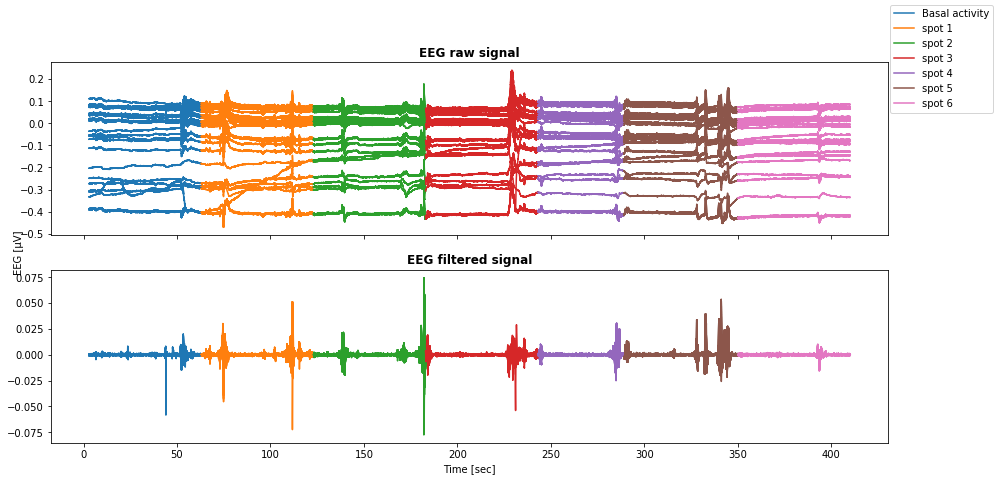

In [10]:
order_n=2
order_bp=2

#Notch filter (IIR)
nbpiir_filtered=raw.copy().set_montage("standard_1020",verbose=verbose)
f0=50
iir_params = dict(order=order_n, ftype='butter', output='ba')
iir_params = mne.filter.construct_iir_filter(iir_params,sfreq=sampling_freq, f_pass= [49, 51],btype='bandstop',return_copy=False, verbose=verbose)
b,a=(iir_params['b'],iir_params['a'])
#plot_freq_response(b,a,sampling_freq)
nbpiir_filtered.notch_filter(f0,method='iir',iir_params={'b':b,'a':a},verbose=verbose)

#Band pass filter (FIR)
bpiir_filtered=raw.copy().set_montage("standard_1020",verbose=verbose)
f1,f2=(0.5,40)
iir_params = dict(order=order_bp, ftype='butter', output='ba')
iir_params = mne.filter.construct_iir_filter(iir_params, f_pass=(f1,f2),sfreq=sampling_freq, btype='bandpass',return_copy=False, verbose=verbose)
b,a=(iir_params['b'],iir_params['a'])
#plot_freq_response(b,a,sampling_freq)
bpiir_filtered.filter(l_freq=f1, h_freq=f2,method='iir',iir_params=iir_params, verbose=verbose)
nbpiir_filtered.filter(l_freq=f1, h_freq=f2,method='iir',iir_params=iir_params, verbose=verbose)

print('\n','\033[1;34m' + 'NOTCH FILTER (Order: %s) + BAND PASS FILTER (Order: %s)'%(order_n,order_bp)+'\033[0;m')
plot_PSD(raw,nbpiir_filtered, filter_applied='Notch + band pass filtered EEG signal')
plt.show()
plot_eeg_time(raw,nbpiir_filtered,i,vmrk_files)

print('\n','\033[1;34m' + 'ONLY BAND PASS FILTER (Order: %s)'%(order_bp)+'\033[0;m')
plot_PSD(raw,bpiir_filtered, filter_applied='Band pass filtered EEG signal')
plt.show()
plot_eeg_time(raw,bpiir_filtered,i,vmrk_files)

Mejor usar **ambos filtros**, sino la interferencia de la red eléctrica (f=50Hz) no se elimina bien.